In [32]:
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
from keras import callbacks
from sklearn.metrics import accuracy_score


In [3]:
BATCH_SIZE = 32
IMG_SIZE = (256, 256)
PATH = 'E:/internship/ai internship/Face Mask Dataset/'

In [4]:
train_dir = os.path.join(PATH, 'Train')

train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)

Found 10000 files belonging to 2 classes.


In [5]:
# validation dataset
validation_dir = os.path.join(PATH, 'Validation')

validation_ds = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)

Found 800 files belonging to 2 classes.


In [6]:
# test dataset
test_dir = os.path.join(PATH, 'Test')

test_ds = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=False)

Found 992 files belonging to 2 classes.


In [7]:
# class names
class_names = train_ds.class_names
print(class_names)

['WithMask', 'WithoutMask']


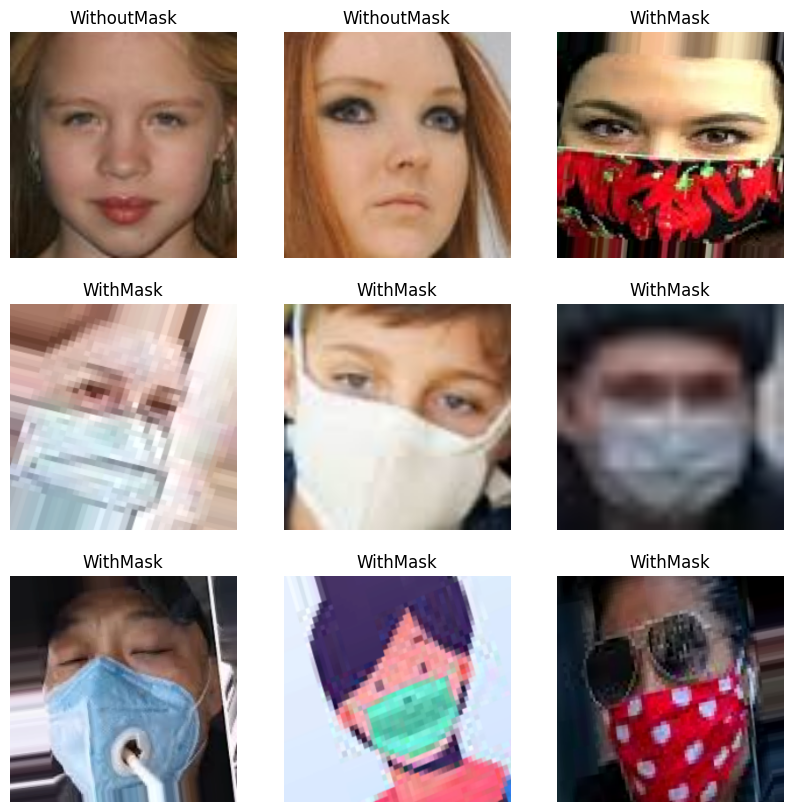

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #128x128
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #64x64
  tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #32x32
  tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #16x16
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [10]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 6, 
                                        restore_best_weights = True, verbose=1)

In [11]:
model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=11,
  callbacks =[earlystopping]
)

Epoch 1/11


313/313 [==============================] - 916s 3s/step - loss: 0.1836 - accuracy: 0.9344 - val_loss: 0.0990 - val_accuracy: 0.9725
Epoch 2/11
313/313 [==============================] - 862s 3s/step - loss: 0.0902 - accuracy: 0.9724 - val_loss: 0.0363 - val_accuracy: 0.9875
Epoch 3/11
313/313 [==============================] - 909s 3s/step - loss: 0.0573 - accuracy: 0.9815 - val_loss: 0.0502 - val_accuracy: 0.9850
Epoch 4/11
313/313 [==============================] - 821s 3s/step - loss: 0.0356 - accuracy: 0.9883 - val_loss: 0.0212 - val_accuracy: 0.9962
Epoch 5/11
313/313 [==============================] - 1230s 4s/step - loss: 0.0253 - accuracy: 0.9917 - val_loss: 0.0133 - val_accuracy: 0.9925
Epoch 6/11
313/313 [==============================] - 1802s 6s/step - loss: 0.0256 - accuracy: 0.9903 - val_loss: 0.0203 - val_accuracy: 0.9912
Epoch 7/11
313/313 [==============================] - 1673s 5s/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0264 - val_accuracy: 0

In [12]:
model.save('m1.h5')

C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
test_pred = model.predict(test_ds)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = np.concatenate([y for x, y in test_ds], axis=0) 

31/31 [==============================] - 13s 403ms/step


Text(0.5, 1.0, 'Confusion Matrix - Test Set')

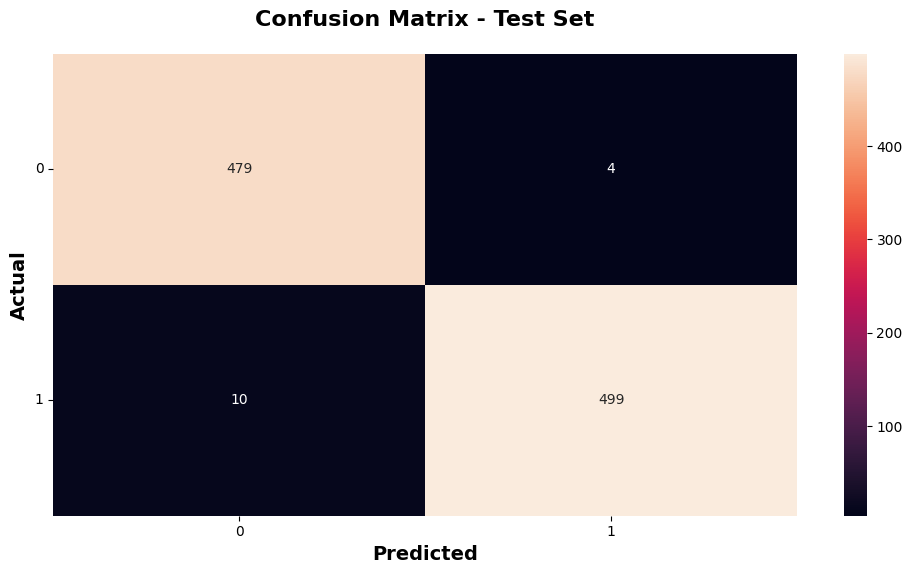

In [22]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [33]:
model = tf.keras.models.load_model('m1.h5')

1/1 [==============================] - 0s 491ms/step


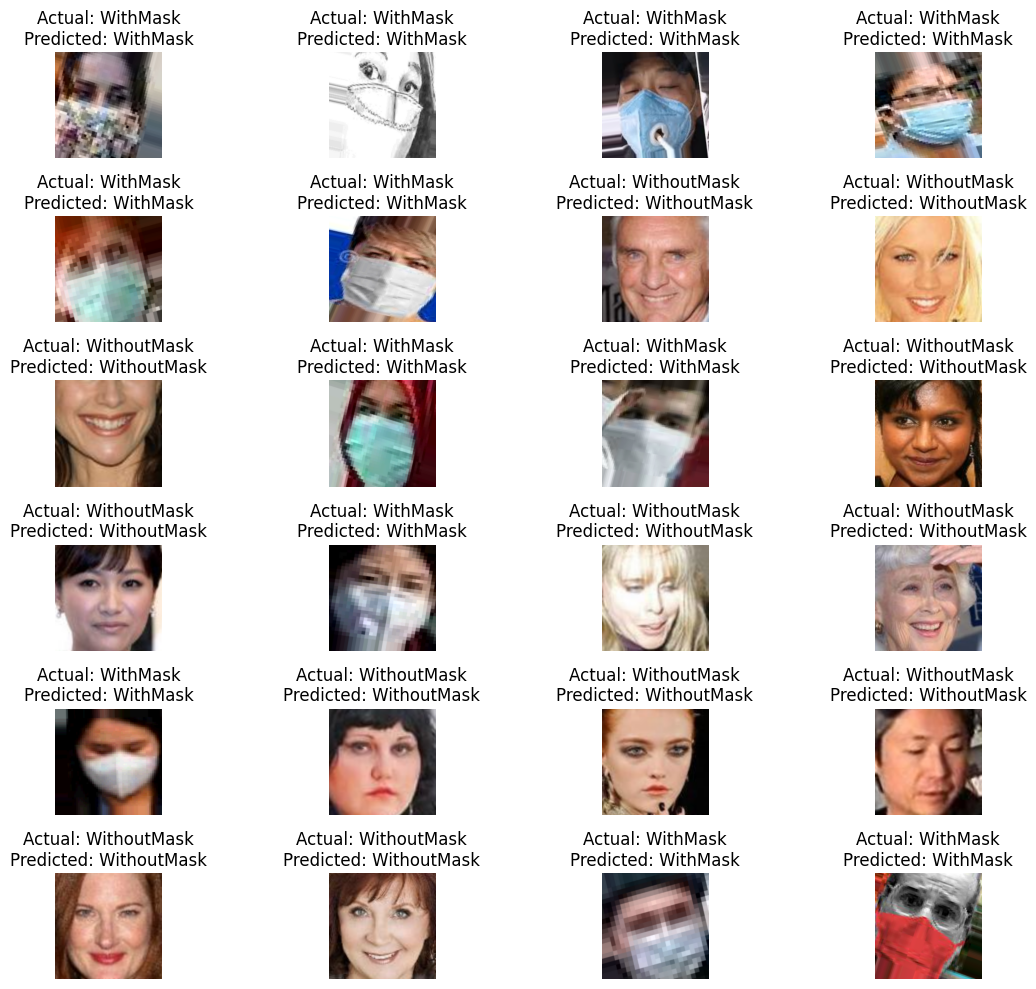

In [53]:
import os
import matplotlib.pyplot as plt

# Assuming test_ds is your test dataset
num_samples_to_display = 24

# Take the first batch from the test dataset
for images, labels in train_ds.take(1):
    # Make predictions
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Display 12 samples in a 3x4 matrix
    fig, axes = plt.subplots(6, 4, figsize=(12, 10))

    for i, ax in enumerate(axes.flatten()):
        actual_label = class_names[labels[i].numpy()]
        predicted_label = class_names[predicted_labels[i]]

        # Display the image
        ax.imshow(images[i].numpy().astype("uint8"))
        ax.set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
        ax.axis('off')

        num_samples_to_display -= 1  # Decrement the counter

        if num_samples_to_display == 0:
            break

    plt.tight_layout()
    plt.show()

    if num_samples_to_display == 0:
        break
